IMPORTACIONES

In [ ]:
from google.colab import drive
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
drive.mount('/content/drive/')
dataset_path = '/content/drive/MyDrive/Datasetpr/Dataset'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_data = {}  # Diccionario para almacenar las imágenes de entrenamiento y sus etiquetas
test_data = {}  # Diccionario para almacenar las imágenes de prueba y sus etiquetas


In [ ]:
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        for data_split in os.listdir(class_dir):
            split_dir = os.path.join(class_dir, data_split)
            if os.path.isdir(split_dir):
                data = train_data if data_split == 'train' else test_data  # Selecciona el diccionario correspondiente
                for filename in os.listdir(split_dir):
                    if filename.endswith(('.jpg')):
                        image_path = os.path.join(split_dir, filename)
                        image = Image.open(image_path)
                        image = image.resize((224, 224))  # Redimensiona la imagen a un tamaño deseado
                        image_array = np.array(image)  # Convierte la imagen a una matriz NumPy
                        image_array = image_array / 255.0  # Normaliza los valores de píxeles entre 0 y 1
                        if class_name not in data:
                            data[class_name] = []  # Inicializa una lista vacía para la clase si no existe aún
                        data[class_name].append(image_array)

# Prepara los datos de entrada y etiquetas de entrenamiento

In [ ]:
X_train = []  # Lista para almacenar las imágenes de entrenamiento
y_train = []  # Lista para almacenar las etiquetas de entrenamiento

In [ ]:
class_to_num = {}  # Diccionario para mapear las clases a valores numéricos

for class_index, (class_name, images) in enumerate(train_data.items()):
    class_to_num[class_name] = class_index  # Asigna un valor numérico a cada clase
    for image_array in images:
        X_train.append(image_array)
        y_train.append(class_index)  # Usa el valor numérico en lugar del nombre de la clase

# Convierte las listas de entrenamiento en matrices NumPy

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

# Convierte las etiquetas de entrenamiento a codificación one-hot

In [ ]:
num_classes = len(class_to_num)  # Número total de clases en el dataset
y_train = tf.one_hot(y_train, num_classes)

# Prepara los datos de entrada y etiquetas de prueba

In [ ]:
X_test = []  # Lista para almacenar las imágenes de prueba
y_test = []  # Lista para almacenar las etiquetas de prueba


In [ ]:
for class_index, (class_name, images) in enumerate(test_data.items()):
    for image_array in images:
        X_test.append(image_array)
        y_test.append(class_index)  # Usa el valor numérico en lugar del nombre de la clase

# Convierte las listas de prueba en matrices NumPy

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)

# Convierte las etiquetas de prueba a codificación one-hot

In [ ]:
y_test = tf.one_hot(y_test, num_classes)

# Define el modelo de clasificación

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(224, 224, 3)),  # Especifica la forma de entrada de la imagen
    layers.Conv2D(16, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # num_classes es el número total de clases en tu dataset
])

# Compila el modelo

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


# Entrena el modelo

In [ ]:

model.fit(X_train, y_train, batch_size=32, epochs=40)  # Ajusta los valores de batch_size y epochs según sea necesario


Epoch 1/40
5/5 [==============================] - 9s 2s/step - loss: 3.7053 - accuracy: 0.2886
Epoch 2/40
5/5 [==============================] - 6s 1s/step - loss: 1.4979 - accuracy: 0.3893
Epoch 3/40
5/5 [==============================] - 8s 2s/step - loss: 1.0938 - accuracy: 0.5034
Epoch 4/40
5/5 [==============================] - 6s 1s/step - loss: 0.8908 - accuracy: 0.7517
Epoch 5/40
5/5 [==============================] - 8s 2s/step - loss: 0.6831 - accuracy: 0.8054
Epoch 6/40
5/5 [==============================] - 6s 1s/step - loss: 0.4942 - accuracy: 0.8725
Epoch 7/40
5/5 [==============================] - 7s 1s/step - loss: 0.3037 - accuracy: 0.9329
Epoch 8/40
5/5 [==============================] - 6s 1s/step - loss: 0.1763 - accuracy: 0.9799
Epoch 9/40
5/5 [==============================] - 7s 1s/step - loss: 0.1007 - accuracy: 0.9933
Epoch 10/40
5/5 [==============================] - 7s 1s/step - loss: 0.0530 - accuracy: 1.0000
Epoch 11/40
5/5 [==============================] 

1/1 [==============================] - 0s 109ms/step


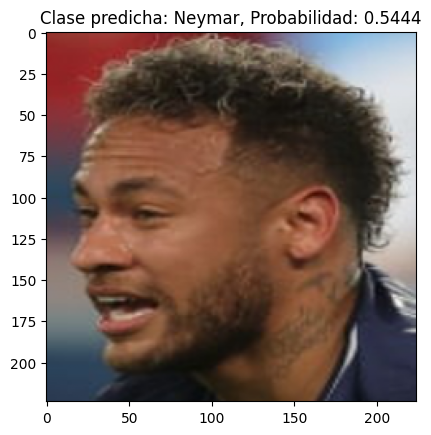

1/1 [==============================] - 0s 38ms/step


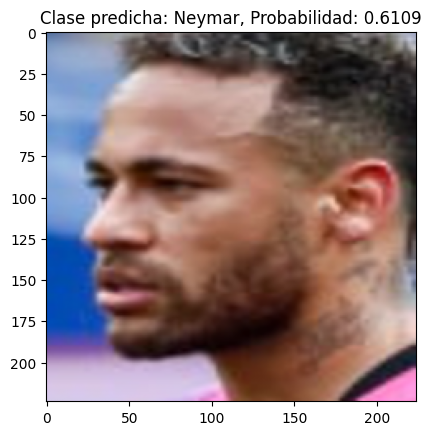

1/1 [==============================] - 0s 36ms/step


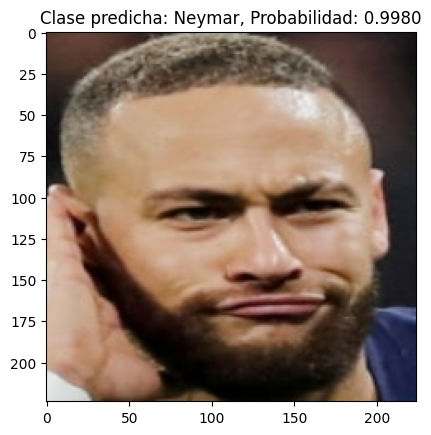

1/1 [==============================] - 0s 63ms/step


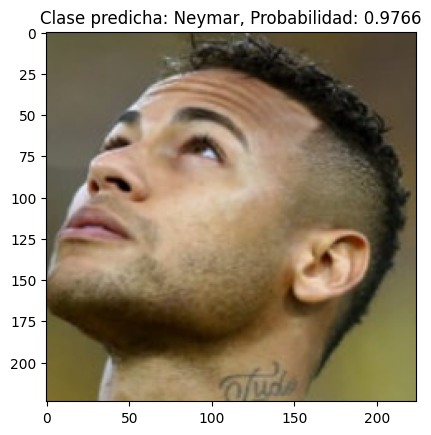

1/1 [==============================] - 0s 37ms/step


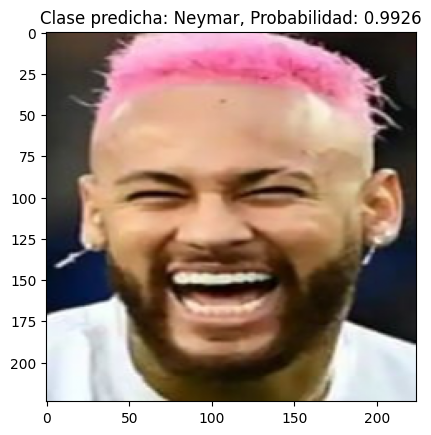

1/1 [==============================] - 0s 51ms/step


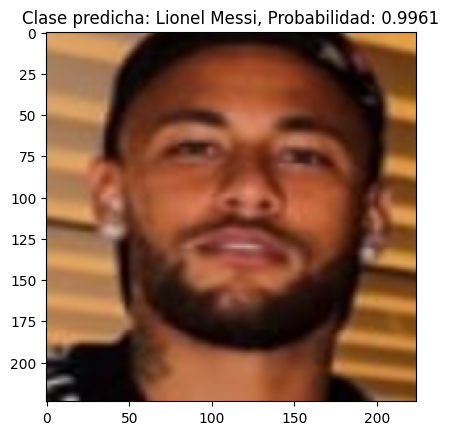

1/1 [==============================] - 0s 42ms/step


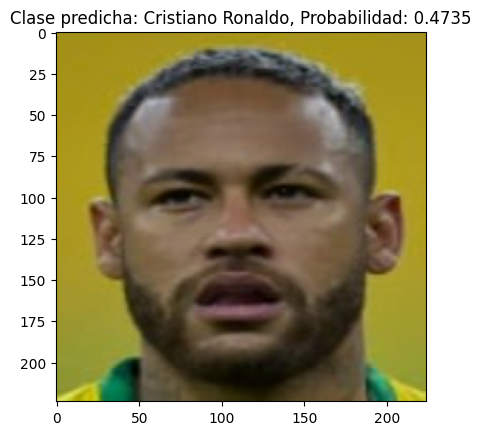

1/1 [==============================] - 0s 39ms/step


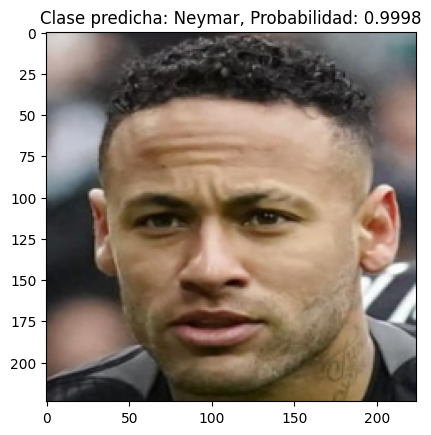

1/1 [==============================] - 0s 51ms/step


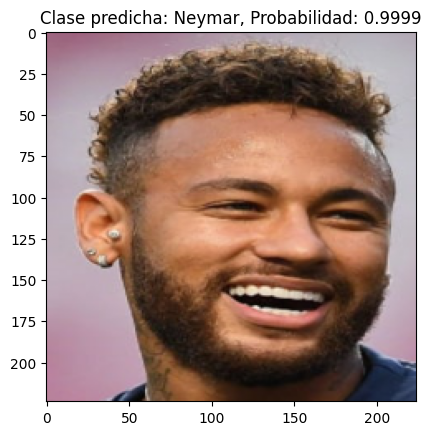

1/1 [==============================] - 0s 48ms/step


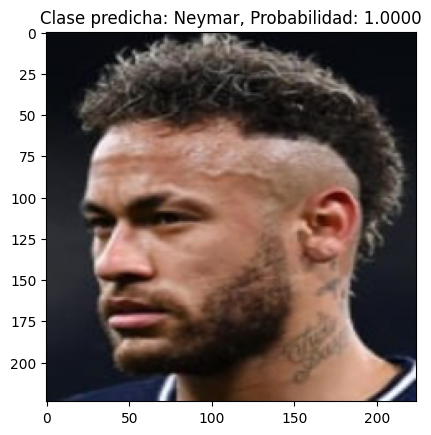

1/1 [==============================] - 0s 54ms/step


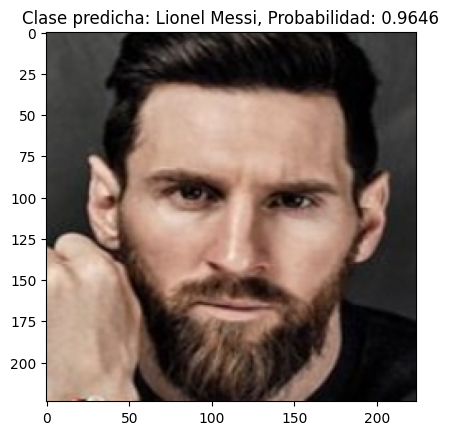

1/1 [==============================] - 0s 37ms/step


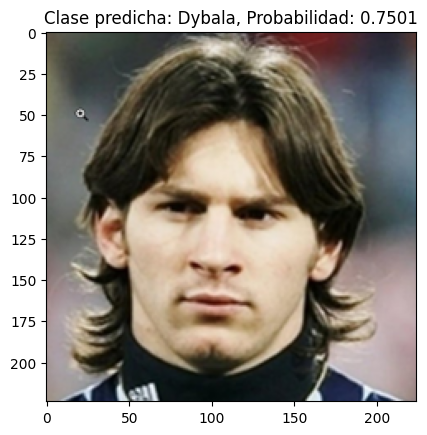

1/1 [==============================] - 0s 48ms/step


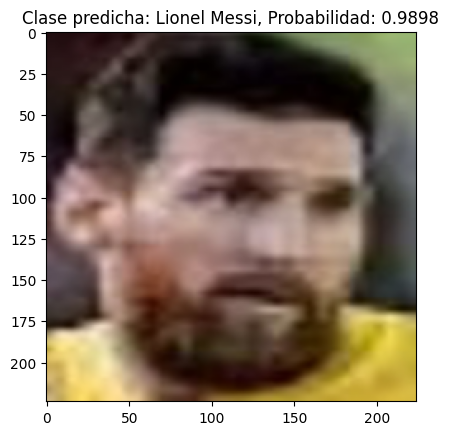

1/1 [==============================] - 0s 41ms/step


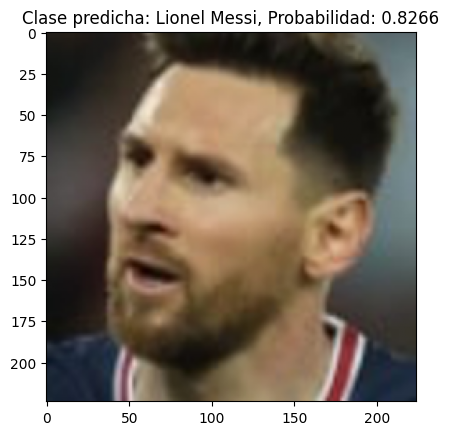

1/1 [==============================] - 0s 57ms/step


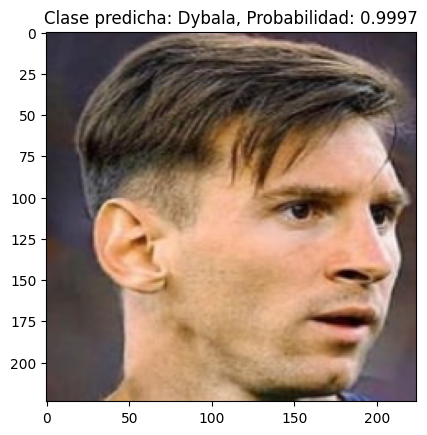

1/1 [==============================] - 0s 69ms/step


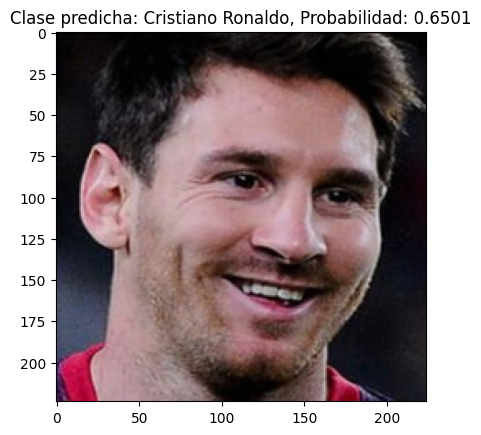

1/1 [==============================] - 0s 99ms/step


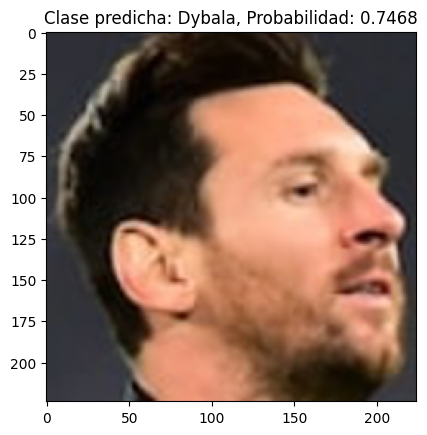

1/1 [==============================] - 0s 60ms/step


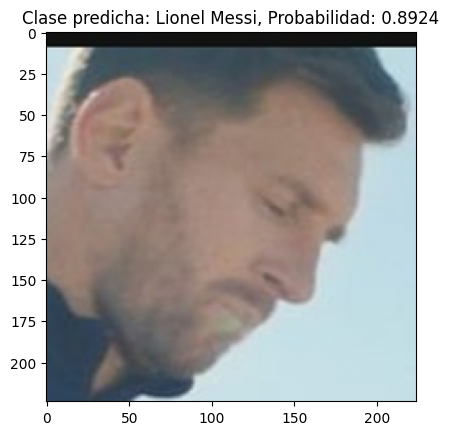

1/1 [==============================] - 0s 57ms/step


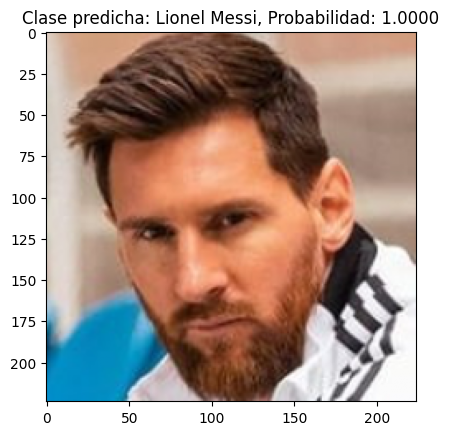

1/1 [==============================] - 0s 81ms/step


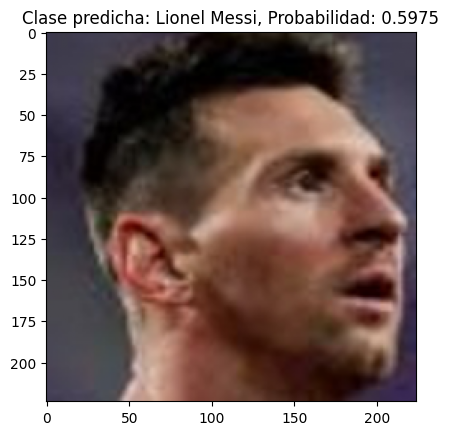

1/1 [==============================] - 0s 84ms/step


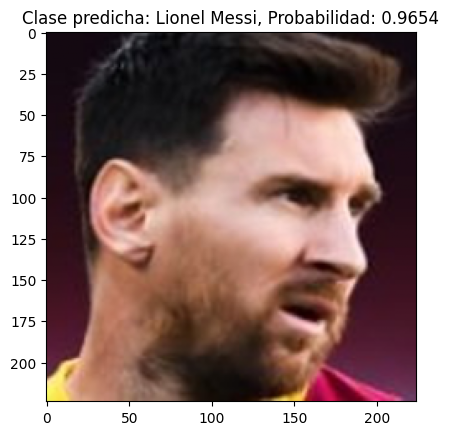

1/1 [==============================] - 0s 114ms/step


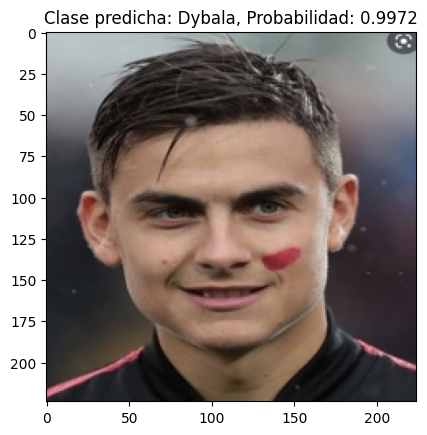

1/1 [==============================] - 0s 78ms/step


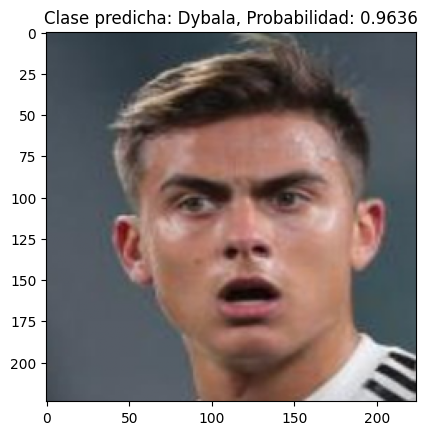

1/1 [==============================] - 0s 79ms/step


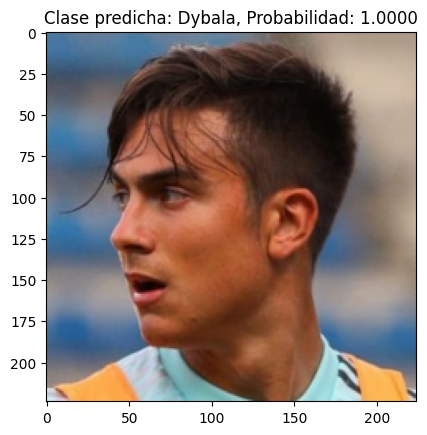

1/1 [==============================] - 0s 53ms/step


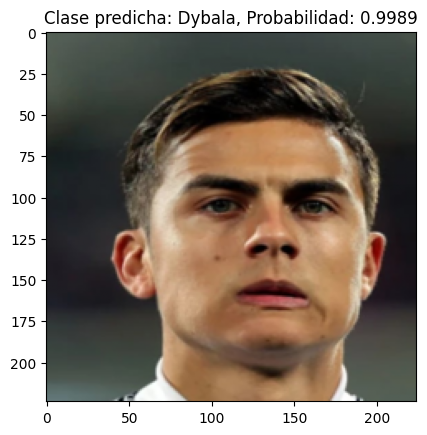

1/1 [==============================] - 0s 59ms/step


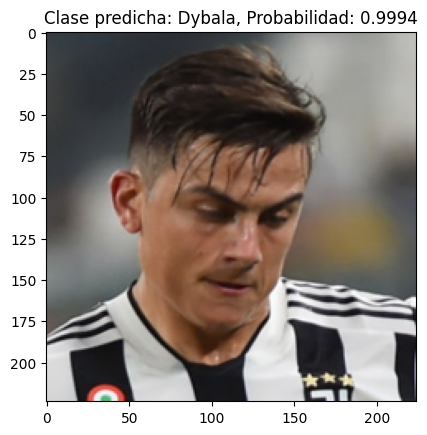

1/1 [==============================] - 0s 53ms/step


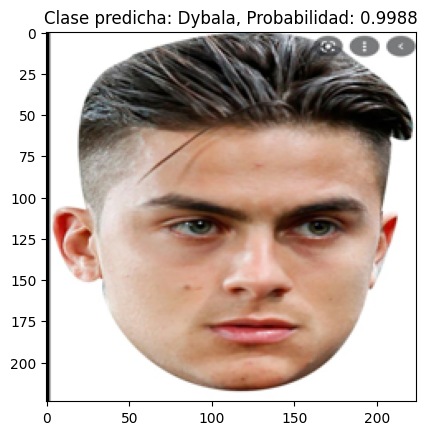

1/1 [==============================] - 0s 51ms/step


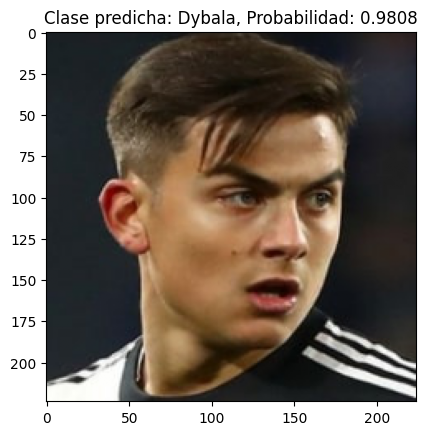

1/1 [==============================] - 0s 48ms/step


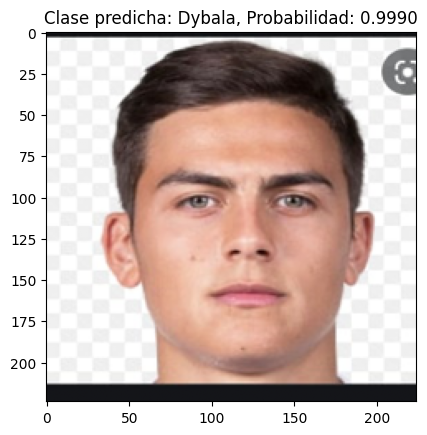

1/1 [==============================] - 0s 57ms/step


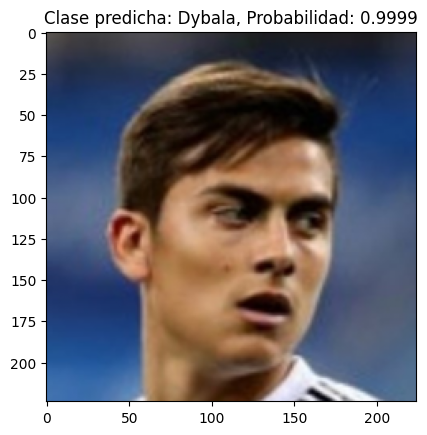

1/1 [==============================] - 0s 50ms/step


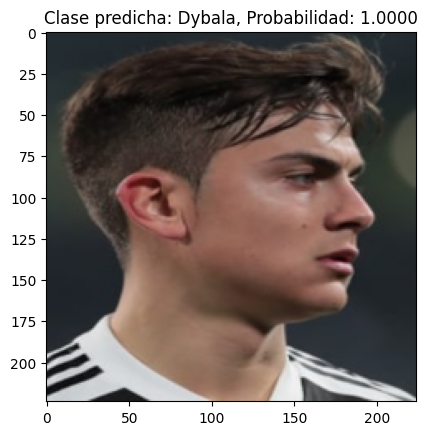

1/1 [==============================] - 0s 58ms/step


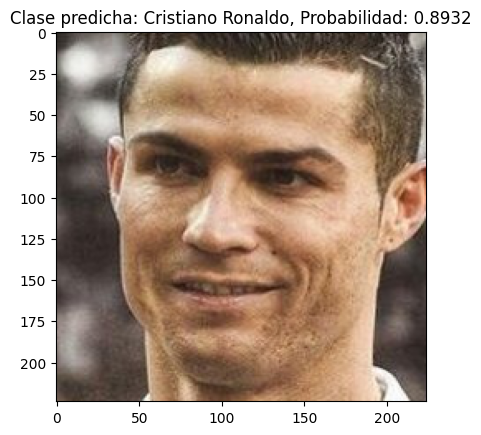

1/1 [==============================] - 0s 59ms/step


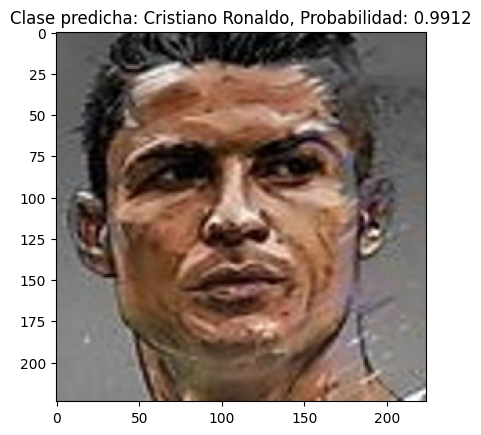

1/1 [==============================] - 0s 54ms/step


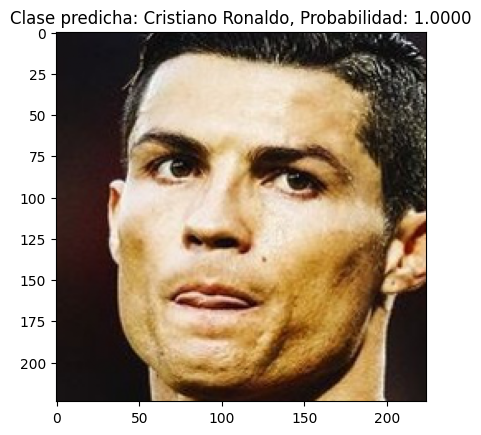

1/1 [==============================] - 0s 47ms/step


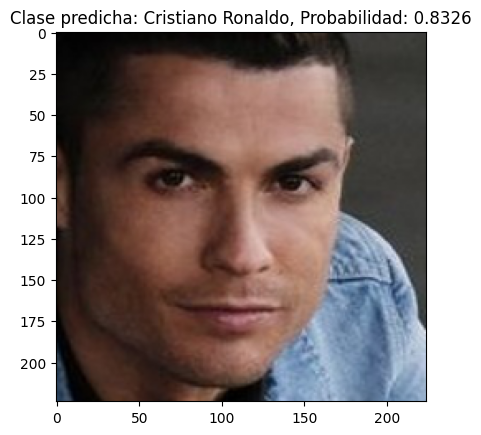

1/1 [==============================] - 0s 63ms/step


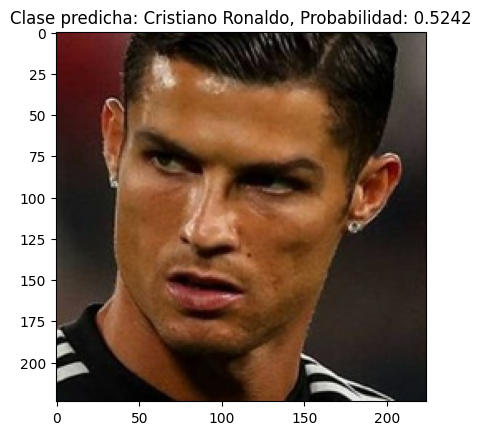

1/1 [==============================] - 0s 57ms/step


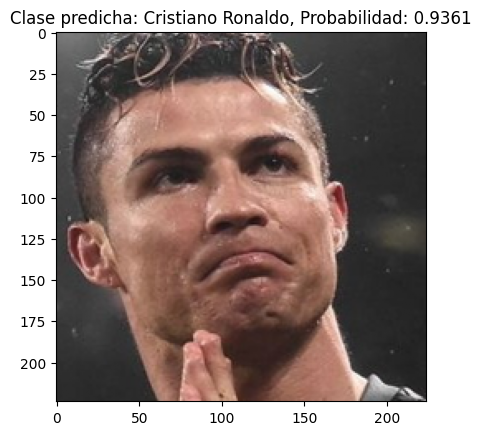

1/1 [==============================] - 0s 53ms/step


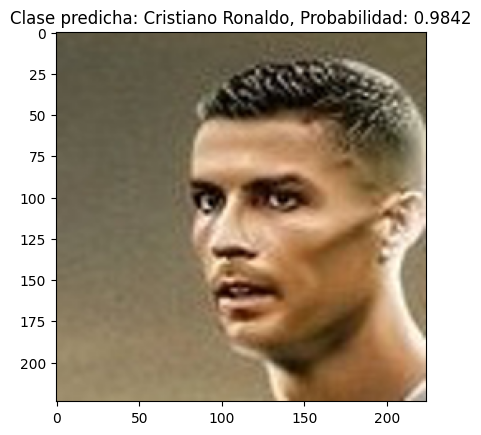

1/1 [==============================] - 0s 56ms/step


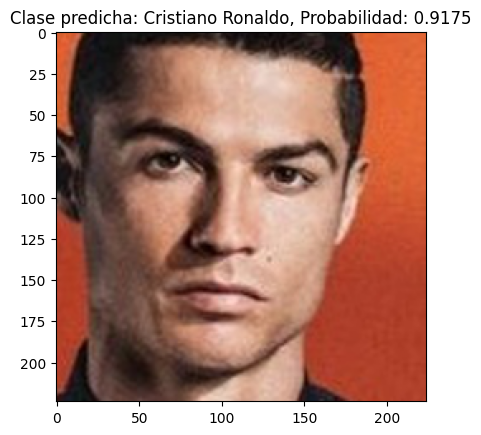

1/1 [==============================] - 0s 59ms/step


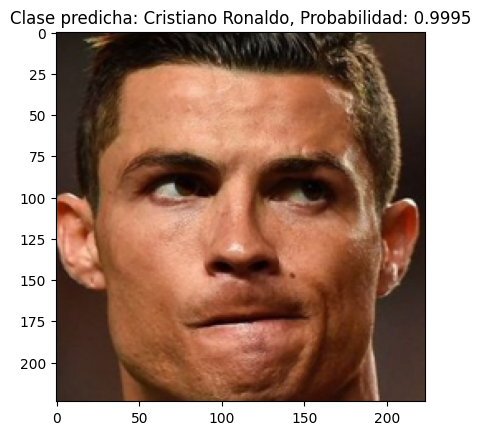

1/1 [==============================] - 0s 58ms/step


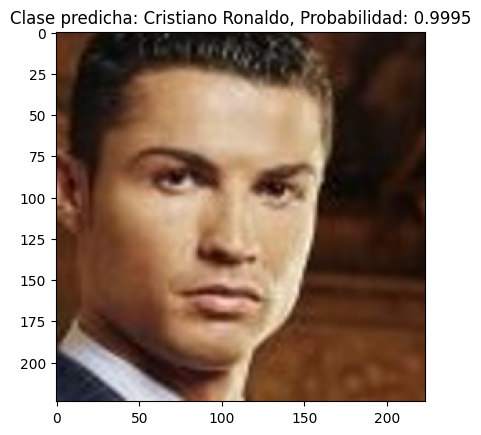

In [ ]:
for class_name, images in test_data.items():
    for image_array in images:
        # Utiliza el modelo para clasificar la imagen
        image_array = np.expand_dims(image_array, axis=0)  # Agrega una dimensión adicional para el lote (batch)
        prediction = model.predict(image_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class = list(test_data.keys())[predicted_class_index]
        predicted_prob = np.max(prediction)  # Obtiene la probabilidad máxima de la predicción
        plt.imshow(image_array[0])  # Muestra la imagen utilizando Matplotlib
        plt.title(f'Clase predicha: {predicted_class}, Probabilidad: {predicted_prob:.4f}')
        plt.show()